### Evaluation of Classification Models for predicting diabetes.

The purpose of this research is to put together the 7 most common types of classification algorithms along with the python code: Logistic Regression, Naïve Bayes, Stochastic Gradient Descent, K-Nearest Neighbours, Decision Tree, Random Forest, and Support Vector Machine to prove that there is some form of an association between BMI, number of pregnancies, pedigree function, and the test results for diabetes. I found that feature importance should be given to Pedigree function as it would be considered as one one the important features for predicting diabetes.
      
Dataset Source and Contents

https://www.kaggle.com/saurabh00007/diabetescsv
https://rpubs.com/ikodesh/53189#:~:text=According%20to%20http%3A%2F%2Fwww,family%20history%20to%20predict%20how


In [42]:
# Import all the tools we need

# Regular EDA ( Exploratory data analysis ) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from SCikit -Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [43]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [46]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

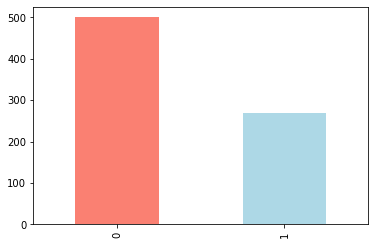

In [47]:
df["Outcome"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###  Diabetes related to Age

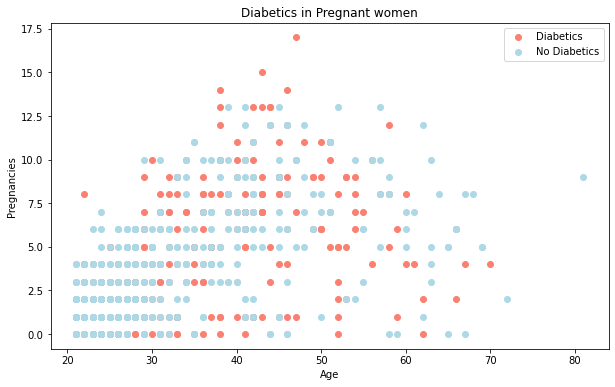

In [50]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.Age[df.Outcome==1],
           df.Pregnancies[df.Outcome==1],c="salmon")

# Scatter with negative examples
plt.scatter(df.Age[df.Outcome==0],
           df.Pregnancies[df.Outcome==0],
           c="lightblue")

# Add some helpful info
plt.title("Diabetics in Pregnant women")
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend(["Diabetics","No Diabetics"]);

In [53]:
data = pd.read_csv("data/diabetes.csv")  
df = pd.DataFrame(data, columns= ['Age','Pregnancies','BMI','DiabetesPedigreeFunction','Outcome'])

print(df)

     Age  Pregnancies   BMI  DiabetesPedigreeFunction  Outcome
0     50            6  33.6                     0.627        1
1     31            1  26.6                     0.351        0
2     32            8  23.3                     0.672        1
3     21            1  28.1                     0.167        0
4     33            0  43.1                     2.288        1
..   ...          ...   ...                       ...      ...
763   63           10  32.9                     0.171        0
764   27            2  36.8                     0.340        0
765   30            5  26.2                     0.245        0
766   47            1  30.1                     0.349        1
767   23            1  30.4                     0.315        0

[768 rows x 5 columns]


In [54]:
data.query('Age > 70',inplace = True)

print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
453            2      119              0              0        0  19.6   
459            9      134             74             33       60  25.9   

     DiabetesPedigreeFunction  Age  Outcome  
453                     0.832   72        0  
459                     0.460   81        0  


In [55]:
df.describe()

,Age,Pregnancies,BMI,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,33.240885,3.845052,31.992578,0.471876,0.348958
std,11.760232,3.369578,7.884160,0.331329,0.476951
min,21.000000,0.000000,0.000000,0.078000,0.000000
25%,24.000000,1.000000,27.300000,0.243750,0.000000
50%,29.000000,3.000000,32.000000,0.372500,0.000000
75%,41.000000,6.000000,36.600000,0.626250,1.000000
max,81.000000,17.000000,67.100000,2.420000,1.000000


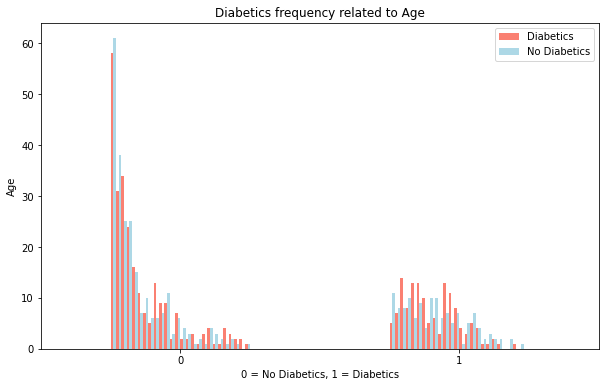

In [56]:
# Create a plot of crosstab
pd.crosstab(df.Outcome,df.Age).plot(kind ="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Diabetics frequency related to Age")
plt.xlabel("0 = No Diabetics, 1 = Diabetics")
plt.ylabel("Age")
plt.legend(["Diabetics","No Diabetics"]);
plt.xticks(rotation=0);

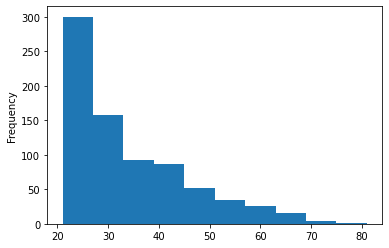

In [57]:
df.Age.plot.hist();

### Diabetes related to BMI

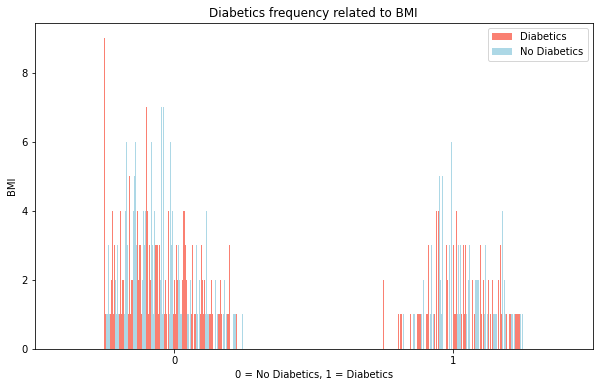

In [58]:
# Create a plot of crosstab
pd.crosstab(df.Outcome,df.BMI).plot(kind ="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Diabetics frequency related to BMI")
plt.xlabel("0 = No Diabetics, 1 = Diabetics")
plt.ylabel("BMI")
plt.legend(["Diabetics","No Diabetics"]);
plt.xticks(rotation=0);

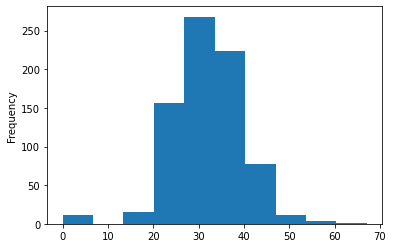

In [59]:
df.BMI.plot.hist();

In [60]:
df.corr()

,Age,Pregnancies,BMI,DiabetesPedigreeFunction,Outcome
Age,1.000000,0.544341,0.036242,0.033561,0.238356
Pregnancies,0.544341,1.000000,0.017683,-0.033523,0.221898
BMI,0.036242,0.017683,1.000000,0.140647,0.292695
DiabetesPedigreeFunction,0.033561,-0.033523,0.140647,1.000000,0.173844
Outcome,0.238356,0.221898,0.292695,0.173844,1.000000


(5.5, -0.5)

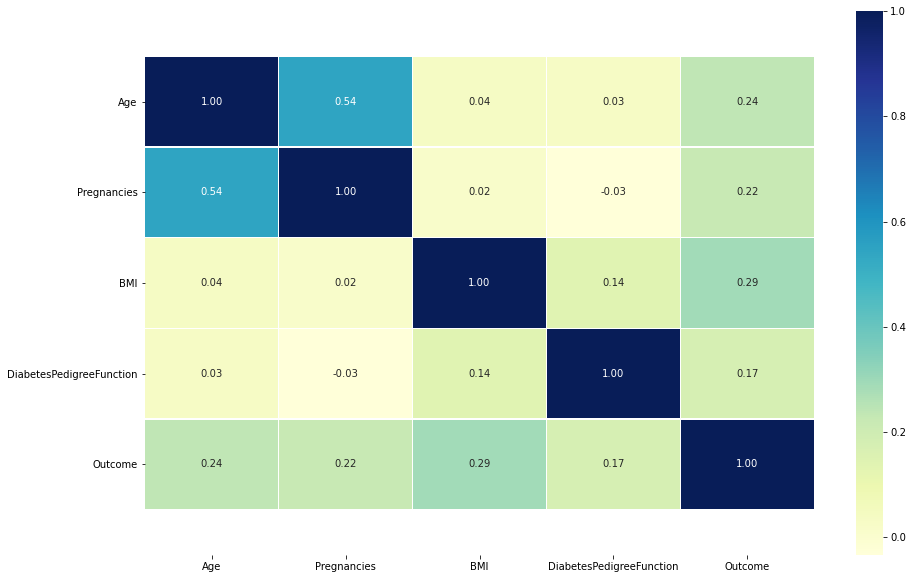

In [61]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize =(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top-0.5)

### Modelling

In [62]:
df.head()

,Age,Pregnancies,BMI,DiabetesPedigreeFunction,Outcome
0,50,6,33.6,0.627,1
1,31,1,26.6,0.351,0
2,32,8,23.3,0.672,1
3,21,1,28.1,0.167,0
4,33,0,43.1,2.288,1


In [64]:
#Split data into X and Y
X = df.drop("Outcome",axis =1)
y = df["Outcome"]

In [65]:
X

,Age,Pregnancies,BMI,DiabetesPedigreeFunction
0,50,6,33.6,0.627
1,31,1,26.6,0.351
2,32,8,23.3,0.672
3,21,1,28.1,0.167
4,33,0,43.1,2.288
...,...,...,...,...
763,63,10,32.9,0.171
764,27,2,36.8,0.340
765,30,5,26.2,0.245
766,47,1,30.1,0.349


In [66]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [67]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [68]:
X_train

,Age,Pregnancies,BMI,DiabetesPedigreeFunction
60,21,2,0.0,0.304
618,50,9,28.2,1.282
346,22,1,28.7,0.654
294,65,0,21.9,0.254
231,46,6,46.2,0.238
...,...,...,...,...
71,26,5,28.6,0.411
106,27,1,22.4,0.207
270,38,10,45.6,1.136
435,29,0,42.4,0.205


In [69]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

### Introducing different Models 
1. Logistic Regression - In this Model, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.
2. Naive Bayes - This model is based on Bayes’ theorem with the assumption of independence between every pair of features
3. Stochastic Gradient Descent - It is a simple and very efficient approach to fit linear models.
4. K-Nearest Neighbours - Classification is computed from a simple majority vote of the k nearest neighbours of each point.
5. Decision Tree - Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.
6. Random Forest - Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting
7. Support Vector Machine - Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. 

Let us find out which model best fits for this requirement.

In [70]:
# Put models in a dictionary

models = { "Logistic Regression": LogisticRegression(),
            "Naive Bayes": GaussianNB(),
            "Stochastic Gradient": SGDClassifier(),
            "KNeighbors Classifier": KNeighborsClassifier(),
            "DecisionTree Classifier": DecisionTreeClassifier(),
            "RandomForest Classifier": RandomForestClassifier(),
            "Support Vector Machine": SVC()}
# Create a function to fit and score models

def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different SCikit-Learn machine learning models
    X_train : training data(no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seeed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [71]:
model_scores = fit_and_score(models=models,
                             X_train= X_train,
                             X_test= X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.6428571428571429,
 'Naive Bayes': 0.6623376623376623,
 'Stochastic Gradient': 0.37012987012987014,
 'KNeighbors Classifier': 0.6818181818181818,
 'DecisionTree Classifier': 0.5974025974025974,
 'RandomForest Classifier': 0.6753246753246753,
 'Support Vector Machine': 0.6233766233766234}

### Model Comparison

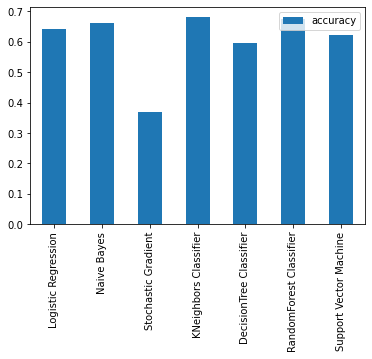

In [72]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we 've got a baseline model... and we know a model's first predictions and always what we should based our next steps off.What should we do?
 
 Let's look at the following:
 
* Hyper parameter tuning
* Feature importance
* Confusion matrix
* Cross - validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the Curve(AUC)

### Hyperparameter tuning

In [73]:
from sklearn.neighbors import KNeighborsClassifier
# Let's tune KNN
train_scores=[]
test_scores= [] 

# create a list of different values for n_nieghbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [74]:
train_scores

[1.0,
 0.8175895765472313,
 0.7899022801302932,
 0.7736156351791531,
 0.7915309446254072,
 0.7687296416938111,
 0.7671009771986971,
 0.760586319218241,
 0.760586319218241,
 0.741042345276873,
 0.747557003257329,
 0.745928338762215,
 0.745928338762215,
 0.7361563517915309,
 0.742671009771987,
 0.7263843648208469,
 0.737785016286645,
 0.742671009771987,
 0.7312703583061889,
 0.7312703583061889]

In [75]:
test_scores

[0.6818181818181818,
 0.6168831168831169,
 0.6818181818181818,
 0.6753246753246753,
 0.6818181818181818,
 0.6883116883116883,
 0.6883116883116883,
 0.6818181818181818,
 0.6623376623376623,
 0.6818181818181818,
 0.6818181818181818,
 0.6753246753246753,
 0.6753246753246753,
 0.6818181818181818,
 0.6818181818181818,
 0.6558441558441559,
 0.6623376623376623,
 0.6558441558441559,
 0.6753246753246753,
 0.6623376623376623]

### Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
 * LogisticRegression()
 * RandomForestClassifier()
...using RandomizedSearchCV


 Maximum KNN score on the test data:68.83%


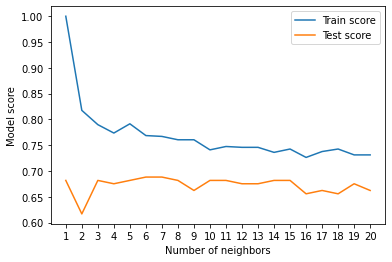

In [76]:
plt.plot(neighbors,train_scores, label = "Train score")
plt.plot(neighbors,test_scores, label = "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f" Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

In [77]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C":np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got Hyperparamter grids setup for each of our models, let tune them using RandomizedSearchCV

In [78]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [79]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [80]:
rs_log_reg.score(X_test, y_test)

0.6493506493506493

In [81]:

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [82]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [83]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.6818181818181818

### Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [84]:

# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [85]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [89]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.6428571428571429

### Evaluting our tuned machine learning classifier, beyond accuracy
 * ROC curve and AUC score
 * Confusion matrix
 * Classification report
 * Precision
 * Recall
 * F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [106]:

# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

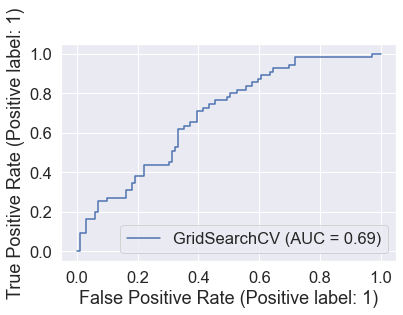

In [107]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)


In [108]:

# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[80 19]
 [36 19]]


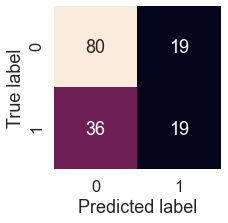

In [109]:
# Import Seaborn
import seaborn as sns

# Increase font size
sns.set(font_scale=1.5) 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)


In [110]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74        99
           1       0.50      0.35      0.41        55

    accuracy                           0.64       154
   macro avg       0.59      0.58      0.58       154
weighted avg       0.62      0.64      0.62       154



In [111]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [112]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.68831169, 0.71428571, 0.65584416, 0.73202614, 0.66013072])

In [113]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6901196842373313

In [114]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.647900053163211

In [115]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.24262753319357092

In [116]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.352478731074261

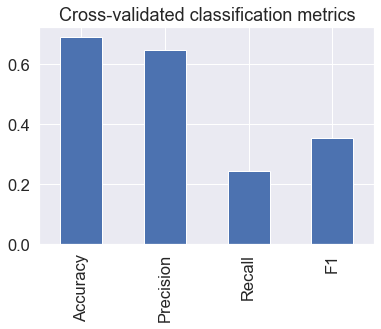

In [117]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [118]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [119]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Age': 0.017903363451490437,
 'Pregnancies': 0.06309065751758605,
 'BMI': 0.03274911133377346,
 'DiabetesPedigreeFunction': 0.36583735640446324}

In [ ]:
Sources:
    https://rpubs.com/ikodesh/53189#:~:text=According%20to%20http%3A%2F%2Fwww,family%20history%20to%20predict%20how

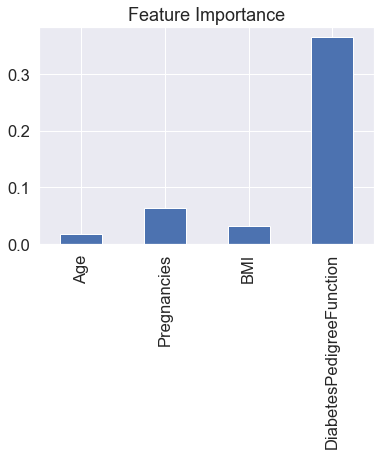

In [121]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend = False);

### Conclusion:

In this study, shows that women have a higher chance of getting diabetes other than Age, BMI, pregnancies , "Diabetes Pedigree function"should be considered as one of the important factor.It  shows the  Diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus.so,Feature importance would be given to DiabetesPedigreeFunction for further investigation. 